In [11]:
# load all the necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np 

In [12]:
# load the dataset
iris_dataset = pd.read_csv('data\\IRIS.csv')

# print the ds to the screen 
iris_dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
iris_dataset.species.replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica': 2}, inplace=True)

In [14]:
# let s split the ds in X and y 
#now I create the X and the y 
X = iris_dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = iris_dataset['species'].values

In [15]:
# instance of kfold 
kfold = StratifiedKFold(n_splits=5, shuffle=False)
kfold.get_n_splits(X, y)
folds = list(kfold.split(X,y))

In [29]:
final_pred = list()
final_true = list() 

for foldcounter, (train_idx, validation_idx) in enumerate(folds):
    print(f"[FOLD {foldcounter}]")
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[validation_idx]
    y_test = y[validation_idx]

    # generate the classifier
    regression = KNeighborsRegressor(n_neighbors=3)
    regression.fit(X_train, y_train)
    prediction = regression.predict(X_test)
    
    final_pred.append(prediction)
    final_true.append(y_test)

# make array out of prediction
final_pred = np.array(final_pred).reshape((-1,))
final_true = np.array(final_true).reshape((-1,))



[FOLD 0]
[FOLD 1]
[FOLD 2]
[FOLD 3]
[FOLD 4]


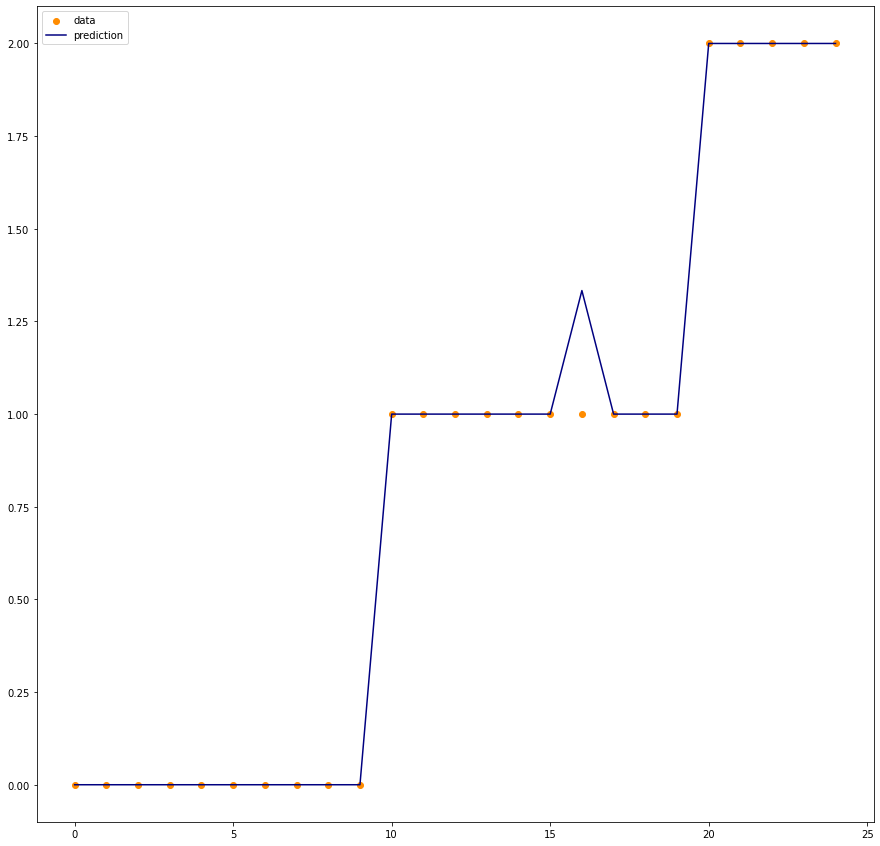

In [35]:
plt.figure(figsize=(15,15))
plt.scatter(range(25), final_true[:25], color="darkorange", label="data")
plt.plot(range(25), final_pred[:25], color='navy', label='prediction')
plt.axis('tight')
plt.legend()